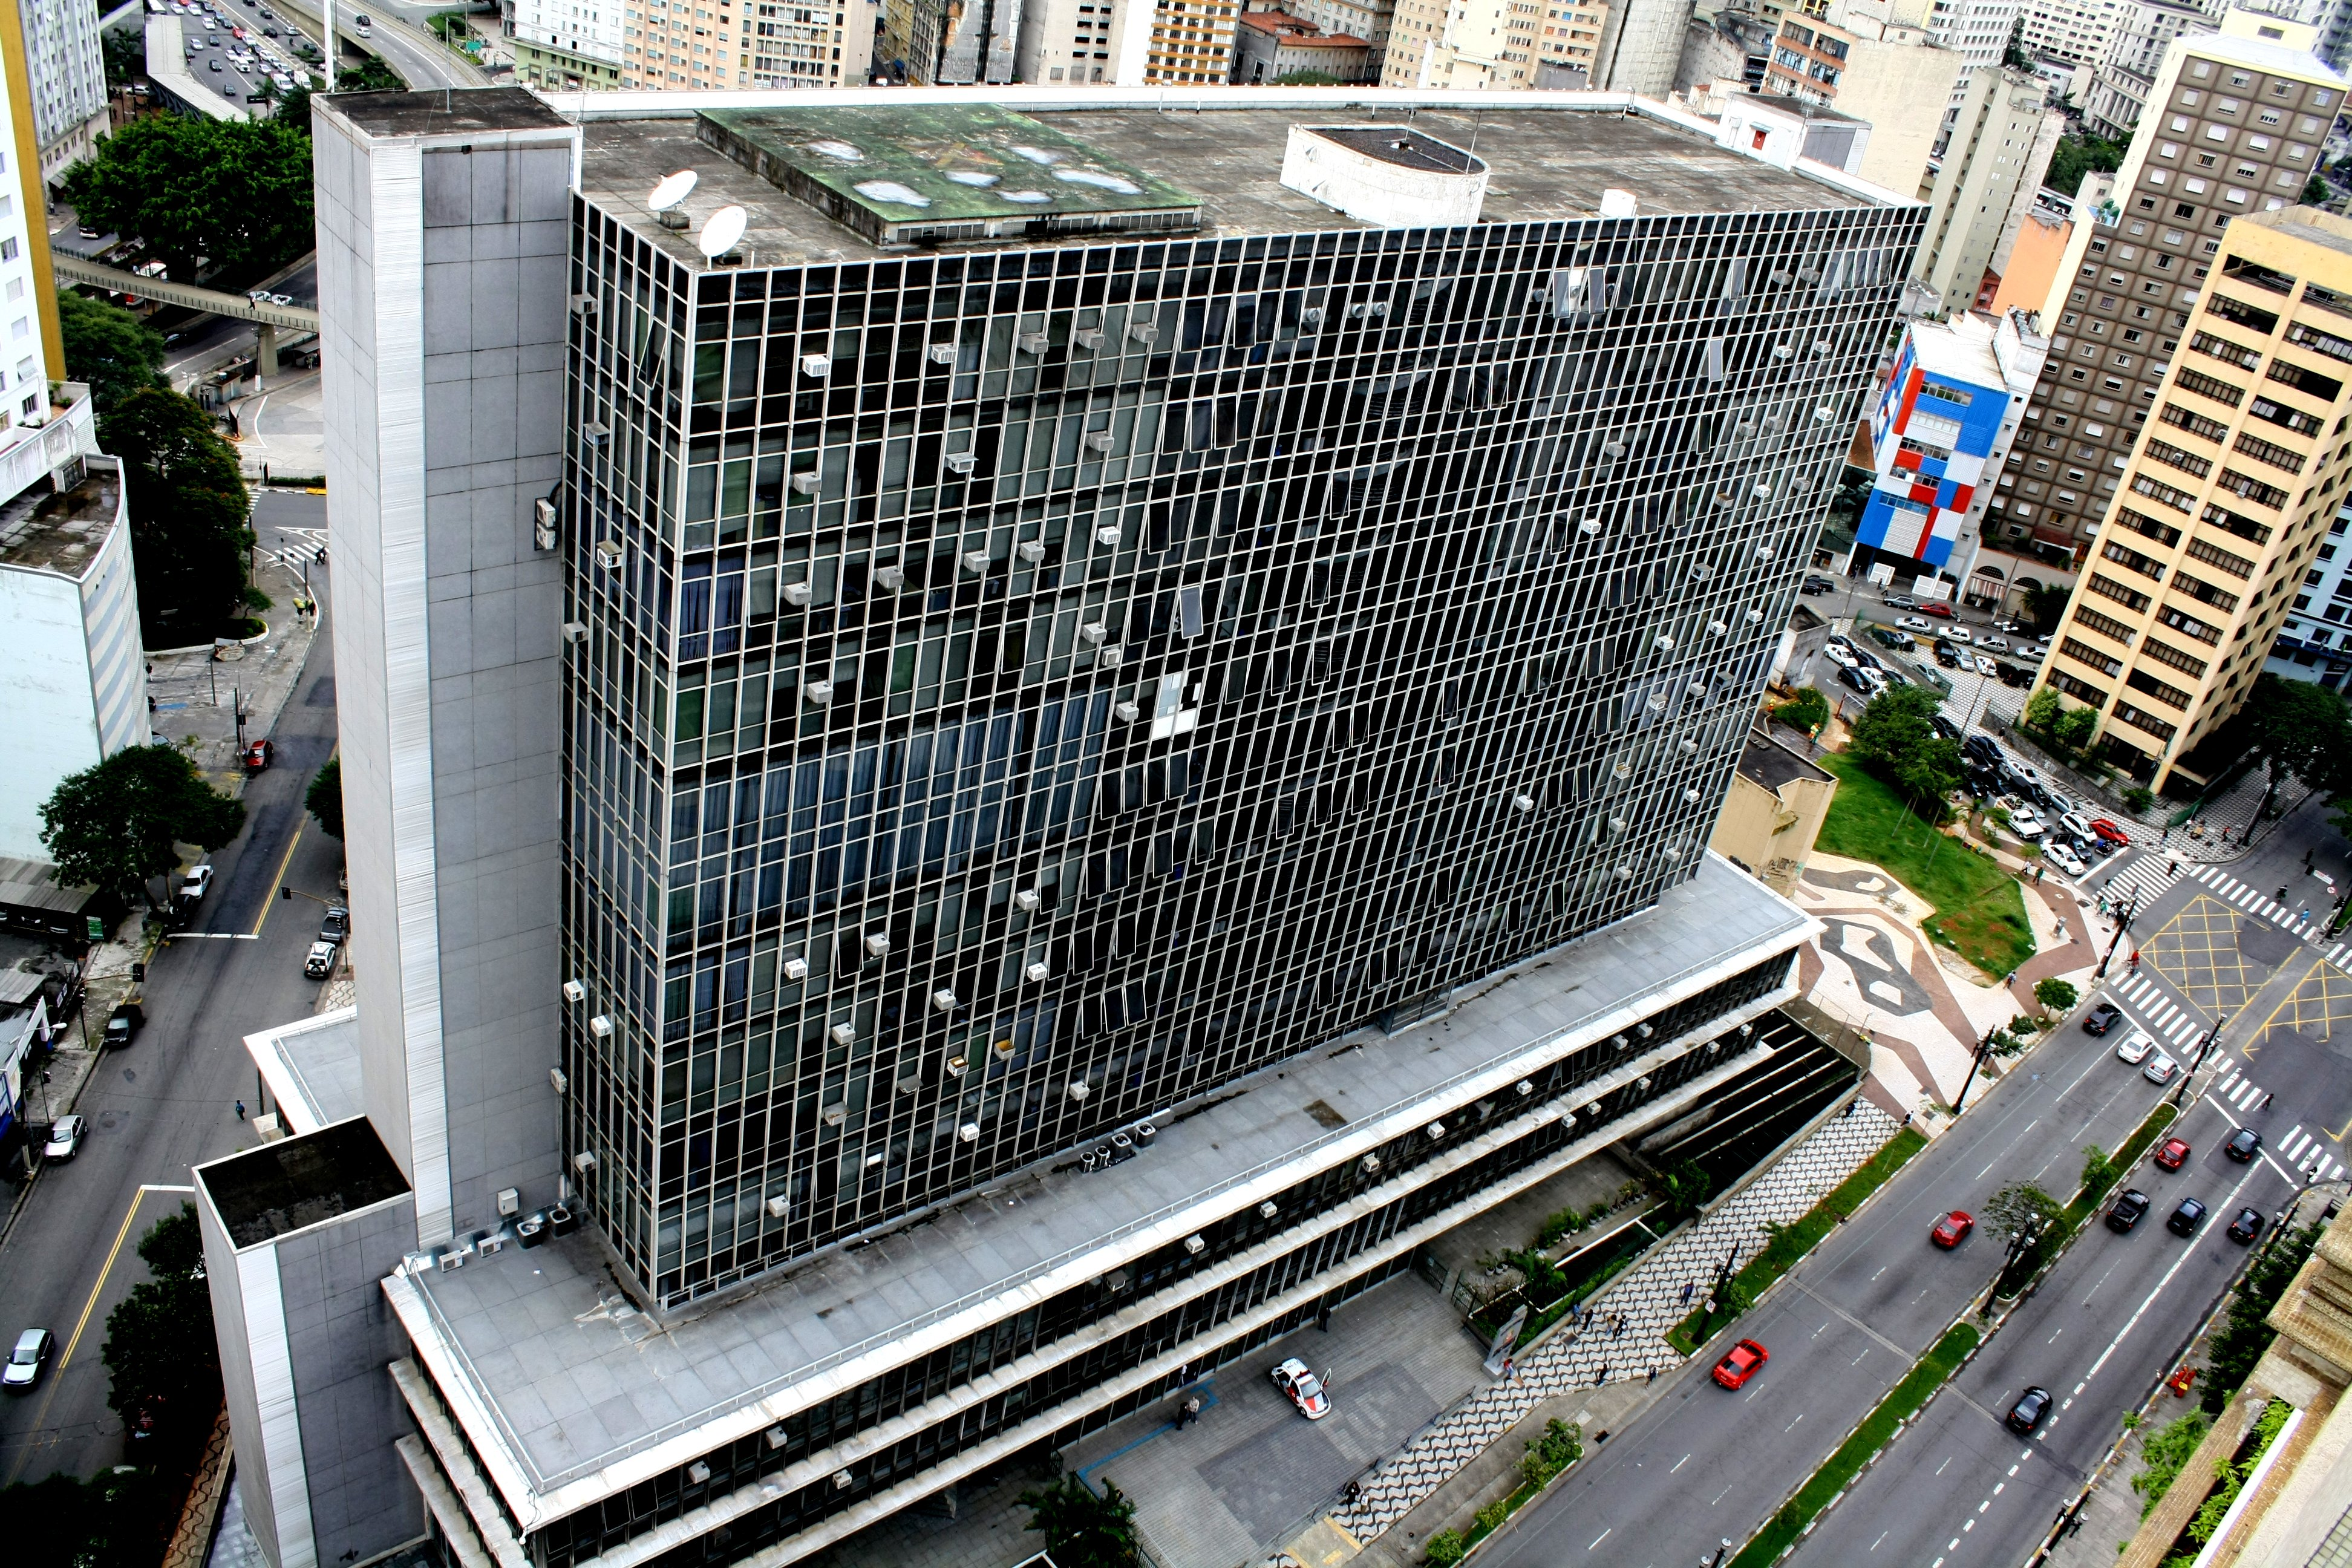

In [41]:
import IPython
url = 'https://upload.wikimedia.org/wikipedia/commons/d/d8/Vista_do_Pal%C3%A1cio_Anchieta.JPG'
IPython.display.Image(url, width = 900)

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
from chart_studio import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

# Importando dados
df = pd.read_csv("C:/Users/pablo/Documents/github/Camara Municipal de São Paulo/camara_municipal_sp_sessoes_12_20.csv",index_col=0)

original_df = df.copy()

In [43]:
original_df

partido  id_parlamentar voto  id_votacao  \
vereador                                                                 
ADILSON AMADEU                    PTB          1296.0  Não        1108   
ADOLFO QUINTAS                   PSDB          1310.0  Sim        1108   
ALFREDINHO                         PT          1447.0  Não        1108   
ANIBAL DE FREITAS FILHO          PSDB          1667.0  Sim        1108   
ARSELINO TATTO                     PT           155.0  Não        1108   
...                               ...             ...  ...         ...   
SOUZA SANTOS             REPUBLICANOS          1633.0  Sim        2922   
TONINHO PAIVA                      PL           220.0  Sim        2922   
TONINHO VESPOLI                  PSOL          1999.0  Não        2922   
XEXÉU TRIPOLI                    PSDB          2158.0  Sim        2922   
ZÉ TURIN                 REPUBLICANOS          2151.0  Sim        2922   

                        tipo_votacao  \
vereador                               
ADILSON AMADEU               Nominal   
ADOLFO QUINTAS               Nominal   
ALFREDINHO                   Nominal   
ANIBAL DE FREITAS FILHO      Nominal   
ARSELINO TATTO               Nominal   
...                              ...   
SOUZA SANTOS                 Nominal   
TONINHO PAIVA                Nominal   
TONINHO VESPOLI              Nominal   
XEXÉU TRIPOLI                Nominal   
ZÉ TURIN                     Nominal   

                                                                   materia  \
vereador                                                                     
ADILSON AMADEU                                      Encerramento da Sessão   
ADOLFO QUINTAS                                      Encerramento da Sessão   
ALFREDINHO                                          Encerramento da Sessão   
ANIBAL DE FREITAS FILHO                             Encerramento da Sessão   
ARSELINO TATTO                                      Encerramento da Sessão   
...                                                                    ...   
SOUZA SANTOS             Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...   
TONINHO PAIVA            Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...   
TONINHO VESPOLI          Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...   
XEXÉU TRIPOLI            Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...   
ZÉ TURIN                 Sub ao PL 643/2020, da COMISSÃO DE FINANÇAS E ...   

                                                                    ementa  \
vereador                                                                     
ADILSON AMADEU                                                         NaN   
ADOLFO QUINTAS                                                         NaN   
ALFREDINHO                                                             NaN   
ANIBAL DE FREITAS FILHO                                                NaN   
ARSELINO TATTO                                                         NaN   
...                                                                    ...   
SOUZA SANTOS              Estima a receita e fixa a despesa do Municípi...   
TONINHO PAIVA             Estima a receita e fixa a despesa do Municípi...   
TONINHO VESPOLI           Estima a receita e fixa a despesa do Municípi...   
XEXÉU TRIPOLI             Estima a receita e fixa a despesa do Municípi...   
ZÉ TURIN                  Estima a receita e fixa a despesa do Municípi...   

                        resultado  presentes  votacao_sim  votacao_nao  \
vereador                                                                 
ADILSON AMADEU           Aprovado       51.0         27.0          8.0   
ADOLFO QUINTAS           Aprovado       51.0         27.0          8.0   
ALFREDINHO               Aprovado       51.0         27.0          8.0   
ANIBAL DE FREITAS FILHO  Aprovado       51.0         27.0          8.0   
ARSELINO TATTO           Aprovado       51.0         27.0          8.0  

A primeira fase deste projeto é ver sobre o que são feitos nossos dados. Quais variáveis são numéricas ou categóricas e quais colunas possuem valores "Null", que é algo que abordaremos na fase de engenharia de recursos.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62278 entries, ADILSON AMADEU to ZÉ TURIN
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partido            58509 non-null  object 
 1   id_parlamentar     58509 non-null  float64
 2   voto               58509 non-null  object 
 3   id_votacao         62278 non-null  int64  
 4   tipo_votacao       62278 non-null  object 
 5   materia            62264 non-null  object 
 6   ementa             39943 non-null  object 
 7   resultado          61954 non-null  object 
 8   presentes          58513 non-null  float64
 9   votacao_sim        58513 non-null  float64
 10  votacao_nao        58513 non-null  float64
 11  votacao_abstencao  58513 non-null  float64
 12  votacao_branco     58513 non-null  float64
 13  notas              23676 non-null  object 
 14  sessao             62278 non-null  object 
 15  data               62278 non-null  object 
dtypes: float64(

In [45]:
df.describe()

id_parlamentar    id_votacao     presentes   votacao_sim   votacao_nao  \
count    58509.000000  6.227800e+04  58513.000000  58513.000000  58513.000000   
mean      1412.584901  9.297417e+05     47.561875     24.323518     12.738913   
std        678.754530  2.874633e+07      6.262188     15.813804     12.616398   
min        132.000000  1.000000e+00     20.000000      0.000000      0.000000   
25%        936.000000  1.536000e+03     44.000000      8.000000      1.000000   
50%       1634.000000  1.987000e+03     49.000000     29.000000      8.000000   
75%       1993.000000  2.467000e+03     52.000000     37.000000     26.000000   
max       2203.000000  9.876543e+08     55.000000     51.000000     45.000000   

       votacao_abstencao  votacao_branco  
count       58513.000000         58513.0  
mean            0.349734             0.0  
std             1.131837             0.0  
min             0.000000             0.0  
25%             0.000000             0.0  
50%             0.000000             0.0  
75%             0.000000             0.0  
max            17.000000             0.0

In [46]:
df.columns

Index(['partido', 'id_parlamentar', 'voto', 'id_votacao', 'tipo_votacao',
       'materia', 'ementa', 'resultado', 'presentes', 'votacao_sim',
       'votacao_nao', 'votacao_abstencao', 'votacao_branco', 'notas', 'sessao',
       'data'],
      dtype='object')

In [47]:
# Verificando a existencia de missing values
df.isnull().sum().sort_values(ascending=False)

notas                38602
ementa               22335
partido               3769
id_parlamentar        3769
voto                  3769
presentes             3765
votacao_sim           3765
votacao_nao           3765
votacao_abstencao     3765
votacao_branco        3765
resultado              324
materia                 14
id_votacao               0
tipo_votacao             0
sessao                   0
data                     0
dtype: int64

In [48]:
df.head()

partido  id_parlamentar voto  id_votacao tipo_votacao  \
vereador                                                                        
ADILSON AMADEU              PTB          1296.0  Não        1108      Nominal   
ADOLFO QUINTAS             PSDB          1310.0  Sim        1108      Nominal   
ALFREDINHO                   PT          1447.0  Não        1108      Nominal   
ANIBAL DE FREITAS FILHO    PSDB          1667.0  Sim        1108      Nominal   
ARSELINO TATTO               PT           155.0  Não        1108      Nominal   

                                        materia ementa resultado  presentes  \
vereador                                                                      
ADILSON AMADEU           Encerramento da Sessão    NaN  Aprovado       51.0   
ADOLFO QUINTAS           Encerramento da Sessão    NaN  Aprovado       51.0   
ALFREDINHO               Encerramento da Sessão    NaN  Aprovado       51.0   
ANIBAL DE FREITAS FILHO  Encerramento da Sessão    NaN  Aprovado       51.0   
ARSELINO TATTO           Encerramento da Sessão    NaN  Aprovado       51.0   

                         votacao_sim  votacao_nao  votacao_abstencao  \
vereador                                                               
ADILSON AMADEU                  27.0          8.0                0.0   
ADOLFO QUINTAS                  27.0          8.0                0.0   
ALFREDINHO                      27.0          8.0                0.0   
ANIBAL DE FREITAS FILHO         27.0          8.0                0.0   
ARSELINO TATTO                  27.0          8.0                0.0   

                         votacao_branco notas                 sessao  \
vereador                                                               
ADILSON AMADEU                      0.0   NaN  371ª Sessão Ordinária   
ADOLFO QUINTAS                      0.0   NaN  371ª Sessão Ordinária   
ALFREDINHO                          0.0   NaN  371ª Sessão Ordinária   
ANIBAL DE FREITAS FILHO             0.0   NaN  371ª Sessão Ordinária   
ARSELINO TATTO                      0.0   NaN  371ª Sessão Ordinária   

                               data  
vereador                             
ADILSON AMADEU           01/08/2012  
ADOLFO QUINTAS           01/08/2012  
ALFREDINHO               01/08/2012  
ANIBAL DE FREITAS FILHO  01/08/2012  
ARSELINO TATTO           01/08/2012

In [49]:
#Verificando quais strings estão disponíveis na coluna "voto"

df["voto"].value_counts()

Sim                       36071
Não                       21803
Abstenção                   532
José Américo (PT)            51
Marco A Cunha (PSD)          45
Souza Santos (PSD)            6
Antônio Vespoli (PSOL)        1
Name: voto, dtype: int64

In [50]:
#Extraindo valores que não deveriam estar na coluna Voto"

df= df[df['voto'] != "José Américo (PT)"]
df= df[df['voto'] != "Marco A Cunha (PSD)"]
df= df[df['voto'] != "Souza Santos (PSD)"]
df= df[df['voto'] != "Antônio Vespoli (PSOL)"]

df["voto"].value_counts()

Sim          36071
Não          21803
Abstenção      532
Name: voto, dtype: int64

ValueError: could not convert string to float: 'PSDB'

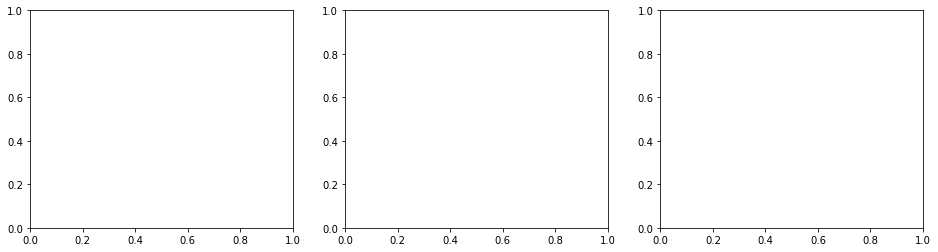

In [51]:
# Distribuição de votos por Partido
votos_sim = df["partido"].loc[df["voto"] == "Sim"].values
votos_nao = df["partido"].loc[df["voto"] == "Não"].values
total_votos = df['partido'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(votos_sim, ax=ax[0], color="#FE642E")
ax[0].set_title("Distribuição dos Votos Sim", fontsize=16)
sns.distplot(votos_nao, ax=ax[1], color="#F781F3")
ax[1].set_title("Distribuição dos Votos Não", fontsize=16)
sns.distplot(total_votos, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total de Votos", fontsize=16)
plt.show()

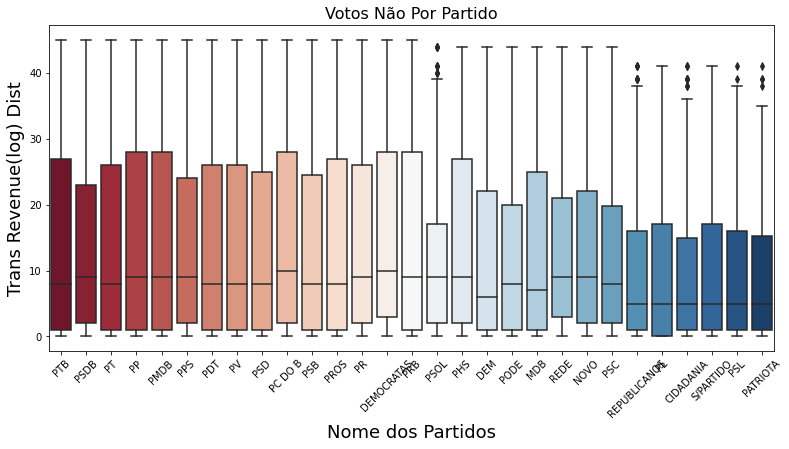

In [52]:
import seaborn as sns

plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='partido', y='votacao_nao', 
                   data=df, palette="RdBu")


g.set_title("Votos Não Por Partido", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Nome dos Partidos', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18) 
plt.show()

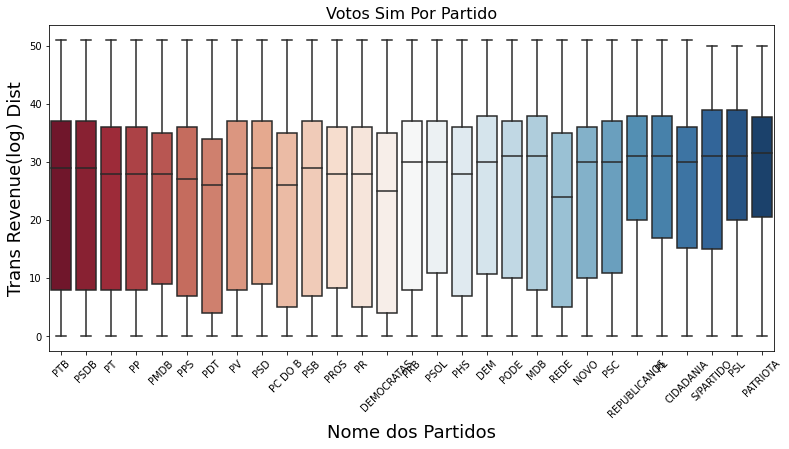

In [53]:

plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='partido', y='votacao_sim', 
                   data=df, palette="RdBu")


g.set_title("Votos Sim Por Partido", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Nome dos Partidos', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18) 
plt.show()

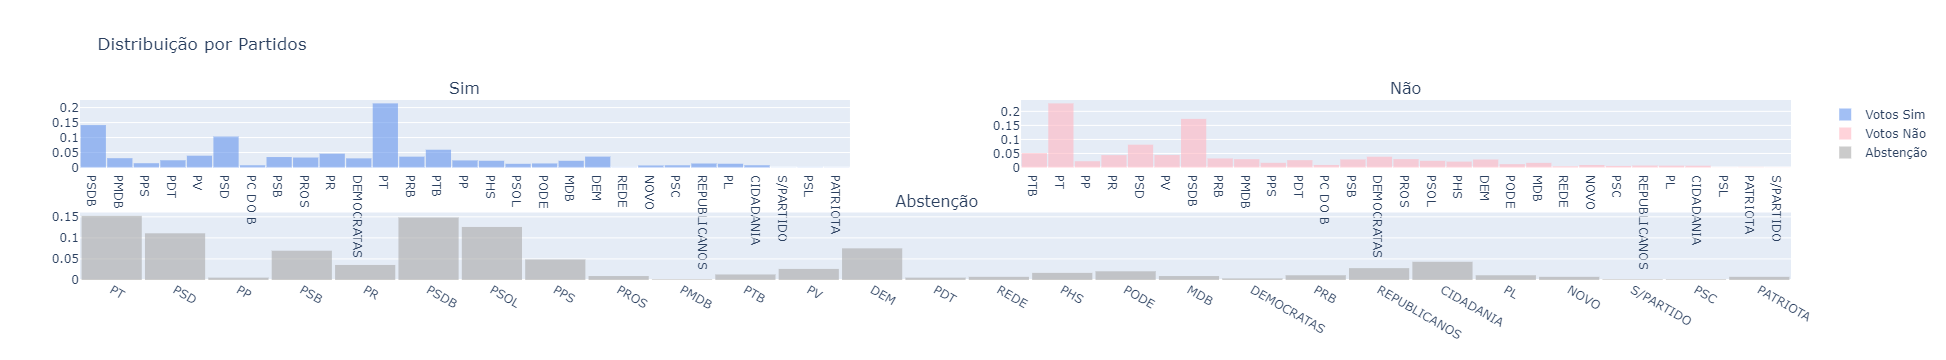

In [68]:


voto_abstencao = df['partido'].loc[df['voto'] == 'Abstenção'].values.tolist()
voto_sim = df['partido'].loc[df['voto'] == 'Sim'].values.tolist()
voto_nao = df['partido'].loc[df['voto'] == 'Não'].values.tolist()

trace0 = go.Histogram(
    x=voto_sim,
    histnorm='probability',
    name="Votos Sim",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x=voto_nao,
    histnorm='probability',
    name="Votos Não",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=voto_abstencao,
    histnorm='probability',
    name="Abstenção",
     marker = dict(
        color = 'rgba(169, 169, 169, 0.6)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Sim','Não', 'Abstenção'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribuição por Partidos', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [71]:
# Voto vs Partido. Vamos ver como os Partidos votam.
df["partido"].unique()
voto_partido = pd.crosstab(df['partido'], df['voto']).apply(lambda x: x/x.sum() * 100)
voto_partido

voto          Abstenção        Não        Sim
partido                                      
CIDADANIA      4.323308   0.628354   0.748524
DEM            7.518797   2.848232   3.634499
DEMOCRATAS     0.375940   3.843508   3.052313
MDB            0.939850   1.651149   2.240027
NOVO           0.751880   0.885199   0.670899
PATRIOTA       0.751880   0.183461   0.127526
PC DO B        0.000000   0.903545   0.745751
PDT            0.563910   2.614319   2.414682
PHS            1.691729   2.105215   2.253888
PL             1.127820   0.651287   1.255857
PMDB           0.187970   2.967482   3.110532
PODE           2.067669   1.197083   1.355660
PP             0.563910   2.242811   2.367553
PPS            4.887218   1.669495   1.433284
PR             3.571429   4.416823   4.610352
PRB            1.127820   3.224327   3.620637
PROS           0.939850   2.985828   3.332317
PSB            6.954887   2.871165   3.493111
PSC            0.187970   0.564143   0.737435
PSD           11.090226   8.127322  10.329628
PSDB          14.849624  17.314131  14.152643
PSL            0.000000   0.087144   0.171883
PSOL          12.593985   2.384993   1.233678
PT            15.225564  22.836307  21.405007
PTB            1.315789   5.136908   5.932744
PV             2.631579   4.444343   3.939453
REDE           0.751880   0.431133   0.185745
REPUBLICANOS   2.819549   0.692565   1.333481
S/PARTIDO      0.187970   0.091730   0.110892

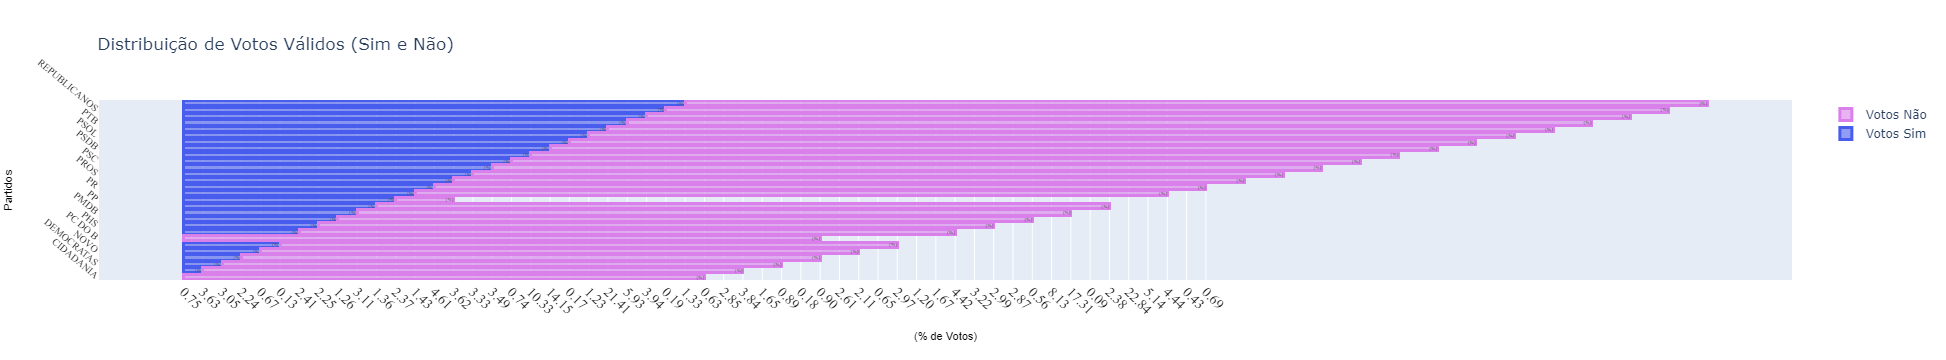

In [77]:

# Values into list
s_partido = voto_partido['Sim'].values.tolist()
n_partido = voto_partido['Não'].values.tolist()
a_partido = voto_partido['Abstenção'].values.tolist()

# Round values
s_partido = ['%.2f' % elem for elem in s_partido]
n_partido = ['%.2f' % elem for elem in n_partido]
a_partido = ['%.2f' % elem for elem in a_partido]

sim = go.Bar(
    y=['CIDADANIA', 'DEM', 'DEMOCRATAS', 'MDB', 'NOVO', "PATRIOTA", "PC DO B", "PDT", "PHS", "PL", "PMDB", "PODE", "PP", "PPS", "PR", "PRB", "PROS", "PSB", "PSC", "PSD", "PSDB", "PSL", "PSOL", "PT", "PTB",
      'REDE', 'REPUBLICANOS', 'S/PARTIDO'],
    x=s_partido,
    name='Votos Sim',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(72, 92, 238, 0.6)',
        line = dict(
            color = 'rgba(72, 92, 238, 1.0)',
            width = 3)
    )
)
nao = go.Bar(
    y=['CIDADANIA', 'DEM', 'DEMOCRATAS', 'MDB', 'NOVO', "PATRIOTA", "PC DO B", "PDT", "PHS", "PL", "PMDB", "PODE", "PP", "PPS", "PR", "PRB", "PROS", "PSB", "PSC", "PSD", "PSDB", "PSL", "PSOL", "PT", "PTB",
      'REDE', 'REPUBLICANOS', 'S/PARTIDO'],
    x=n_partido,
    name='Votos Não',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(217, 128, 234, 0.6)',
        line = dict(
            color = 'rgba(217, 128, 234, 1.0)',
            width = 3)
    )
)

data = [sim, nao]
layout = dict(
    title='Distribuição de Votos Válidos (Sim e Não)',
     xaxis=dict(
        title='(% de Votos)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Partidos',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=40,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=10,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    barmode='stack'
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')